# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

584

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL for GET requests to retrieve city data
lat = []
max_temp = []
lon = []
n = 0
cities1=[]
country = []
cloudiness = []
date = []
humidity = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval     ")
print("-----------------------------")
for city in cities:
    
#     # Build query URL
    
    try:
        query_url = url + "appid=" + api_key + "&q=" + city
        response = requests.get(query_url).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        cities1.append(city)
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response ['wind']['speed'])
        n = n+1
        print(f"Processing Record {n} of Set 1 | {city}")
    except KeyError:
        pass
    time.sleep(2)

   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | jumla
Processing Record 4 of Set 1 | tuatapere
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | goure
Processing Record 7 of Set 1 | podor
Processing Record 8 of Set 1 | ahipara
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | adilabad
Processing Record 11 of Set 1 | eureka
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | deer lake
Processing Record 14 of Set 1 | whakatane
Processing Record 15 of Set 1 | pecos
Processing Record 16 of Set 1 | tevaitoa
Processing Record 17 of Set 1 | san borja
Processing Record 18 of Set 1 | santa ana
Processing Record 19 of Set 1 | wamba
Processing Record 20 of Set 1 | camopi
Processing Record 21 of Set 1 | dwarka
Processing Record 22 of Set 1 | sinnamary
Processing Record 23 of Set 1 | nelson bay
Processing Recor

Processing Record 195 of Set 1 | sorland
Processing Record 196 of Set 1 | fortuna
Processing Record 197 of Set 1 | rawson
Processing Record 198 of Set 1 | grindavik
Processing Record 199 of Set 1 | kamiiso
Processing Record 200 of Set 1 | bhanvad
Processing Record 201 of Set 1 | broken hill
Processing Record 202 of Set 1 | palana
Processing Record 203 of Set 1 | maceio
Processing Record 204 of Set 1 | lompoc
Processing Record 205 of Set 1 | shimoda
Processing Record 206 of Set 1 | faya
Processing Record 207 of Set 1 | hasaki
Processing Record 208 of Set 1 | erenhot
Processing Record 209 of Set 1 | umm lajj
Processing Record 210 of Set 1 | khanpur
Processing Record 211 of Set 1 | praxedis guerrero
Processing Record 212 of Set 1 | belluno
Processing Record 213 of Set 1 | fairbanks
Processing Record 214 of Set 1 | nizhniy baskunchak
Processing Record 215 of Set 1 | trelew
Processing Record 216 of Set 1 | necochea
Processing Record 217 of Set 1 | mehamn
Processing Record 218 of Set 1 | kay

Processing Record 390 of Set 1 | bara
Processing Record 391 of Set 1 | krasnoslobodsk
Processing Record 392 of Set 1 | chicama
Processing Record 393 of Set 1 | sabha
Processing Record 394 of Set 1 | cubuk
Processing Record 395 of Set 1 | araouane
Processing Record 396 of Set 1 | los angeles
Processing Record 397 of Set 1 | mount pleasant
Processing Record 398 of Set 1 | jovellar
Processing Record 399 of Set 1 | dakar
Processing Record 400 of Set 1 | kropotkin


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {
    "City": cities1,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "lat": lat,
    "lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)


weather_data.to_csv("output_data/openweather_cities.csv",
                  encoding="utf-8", index=False, header=True)

weather_data.count()

City          400
Cloudiness    400
Country       400
Date          400
Humidity      400
lat           400
lng           400
Max Temp      400
Wind Speed    400
dtype: int64

In [8]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,lat,lng,Max Temp,Wind Speed
0,pevek,0,RU,1552784262,90,69.70,170.27,246.913,6.16
1,khatanga,64,RU,1552784264,73,71.98,102.47,249.338,0.51
2,jumla,80,NP,1552784267,77,29.28,82.18,269.663,0.96
3,tuatapere,8,NZ,1552783806,73,-46.13,167.69,290.930,2.06
4,mar del plata,0,AR,1552784273,38,-46.43,-67.52,295.938,6.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

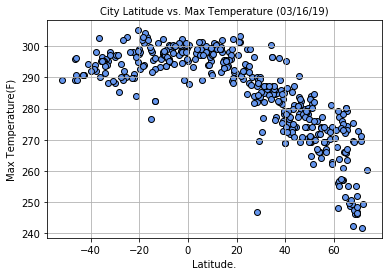

In [41]:

plt.scatter(lat, max_temp, alpha=1, c='cornflowerblue', edgecolors='black')
    
    
# Create a legend
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (03/16/19)",fontsize=10)
plt.xlabel("Latitude.")
plt.ylabel("Max Temperature(F)")

# Save Figure
plt.savefig("Images/latvstemp.png")


#### Latitude vs. Humidity Plot

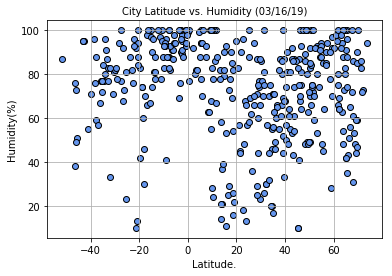

In [42]:
plt.scatter(lat, humidity, alpha=1, c='cornflowerblue', edgecolors='black')
    
    
# Create a legend
plt.grid(True)
plt.title("City Latitude vs. Humidity (03/16/19)",fontsize=10)
plt.xlabel("Latitude.")
plt.ylabel("Humidity(%)")

# Save Figure
plt.savefig("Images/latvsHumy.png")

#### Latitude vs. Cloudiness Plot

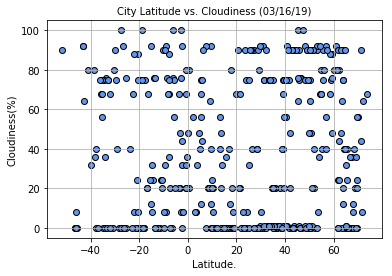

In [43]:
plt.scatter(lat, cloudiness, alpha=1, c='cornflowerblue', edgecolors='black')
    
    
# Create a legend
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (03/16/19)",fontsize=10)
plt.xlabel("Latitude.")
plt.ylabel("Cloudiness(%)")

# Save Figure
plt.savefig("Images/latvsCloud.png")

#### Latitude vs. Wind Speed Plot

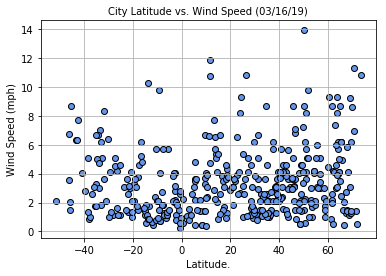

In [44]:
plt.scatter(lat, wind_speed, alpha=1, c='cornflowerblue', edgecolors='black')
    
    
# Create a legend
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (03/16/19)",fontsize=10)
plt.xlabel("Latitude.")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig("Images/latvsWindspeed.png")